## Classification
- Classification is the process of determining which category a new observation belongs to, using a training set composed of basic observations and known categories.

## Contents:
1. **Logistic Regression**
    - What is Logistic Regression?
    - Implementing Logistic Regression from Scratch
    - Training and Testing a Logistic Regression Model with Scikit-learn
2. **K-Nearest Neighbors**
    - What is K-Nearest Neighbors?
    - Preprocessing
    - Training and Testing the K-Nearest Neighbors Algorithm
    - Finding the Best K Value
3. **Support Vector Machine**
    - What is a Support Vector Machine?
    - Preprocessing
    - Training and Testing the Support Vector Machine Algorithm
4. **Decision Tree**
    - What is a Decision Tree?
    - Preprocessing
    - Training and Testing the Decision Tree Algorithm
5. **Random Forest**
    - What is a Random Forest?
    - Preprocessing
    - Training and Testing the Random Forest Algorithm
6. **Evaluation of Classification Models**
    - Accuracy
    - Confusion Matrix

### Logistic Regression
#### What is Logistic Regression?
- Although the name includes "regression," logistic regression is actually a classification algorithm.
- In statistics, the logistic model is used to model the probability of a certain class or event, such as success/failure, win/lose, alive/dead, or healthy/sick.
- It is typically used for classifying data that contains two classes.
- We will learn the logistic regression method in depth because it is fundamental to artificial neural networks.
- How does logistic regression learn?
    1. Weights are multiplied by the input and bias is added. z=(w⋅t)x+b
    2. The output of the first step (z) is passed through the sigmoid function.
    3. The output of the sigmoid function is a probabilistic result, which is then fed into the loss function.
    4. The outputs of the loss function are summed to obtain the cost value.
    5. The change (derivative) is calculated based on the cost value.
    6. Parameters are updated using gradient descent.
    7. This process is repeated to obtain the optimal weights and bias values.

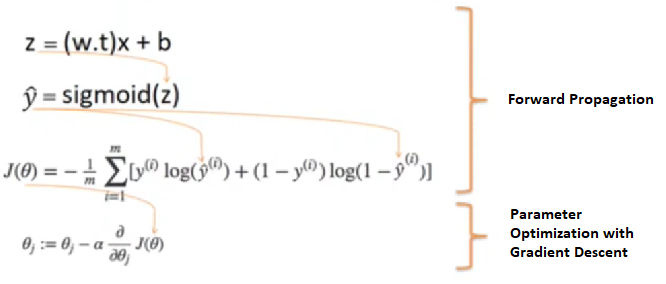

#### Importing and Quickly Introducing the Data
- In this section, we will use the "Biomechanical Features of Orthopedic Patients" dataset.
- This dataset includes features of bones and indicates whether the patient is normal or not based on these features.
- The features included in the dataset are:
    1. pelvic tilt = pelvik eğim
    2. lumbar lordosis angle = lomber lordoz açısı
    3. sacral slope = sakral eğim
    4. pelvic incidence = pelvik insidans
    5. pelvic radius = pelvik yarıçap
    6. grade of spondylolisthesis = spondilolistez derecesi
    
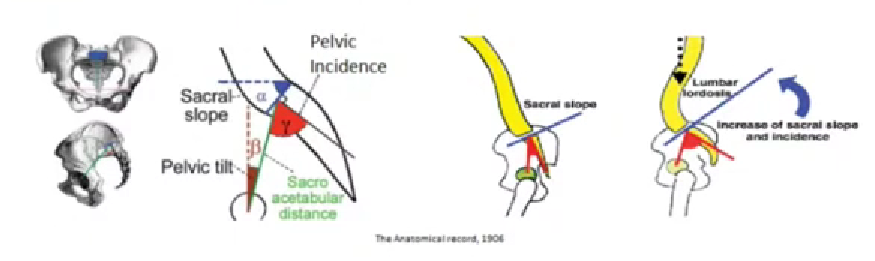

In [1]:
# Import libraries
import os
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn 
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
# the relevant folder where the data is located
os.chdir('C:/Users/ST27/Desktop/EDU/DS/BootCamp/1. Data sources/AEY')

df = pd.read_csv('Bio.csv')
df.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


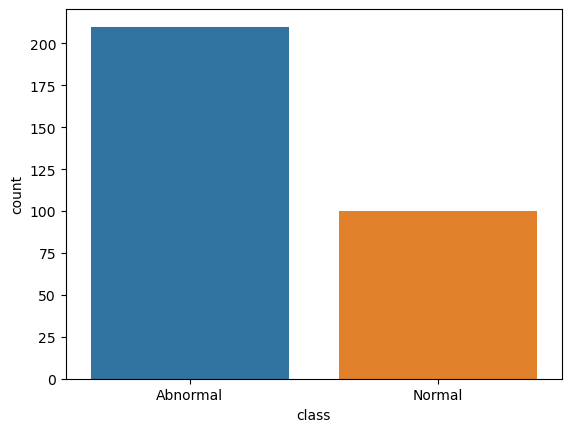

In [3]:
sns.countplot(x="class", data=df)
plt.show()

In [4]:
df["class"] = [1 if each == "Abnormal" else 0 for each in df["class"]]
x_data = df.drop(["class"], axis = 1)
y = df["class"].values

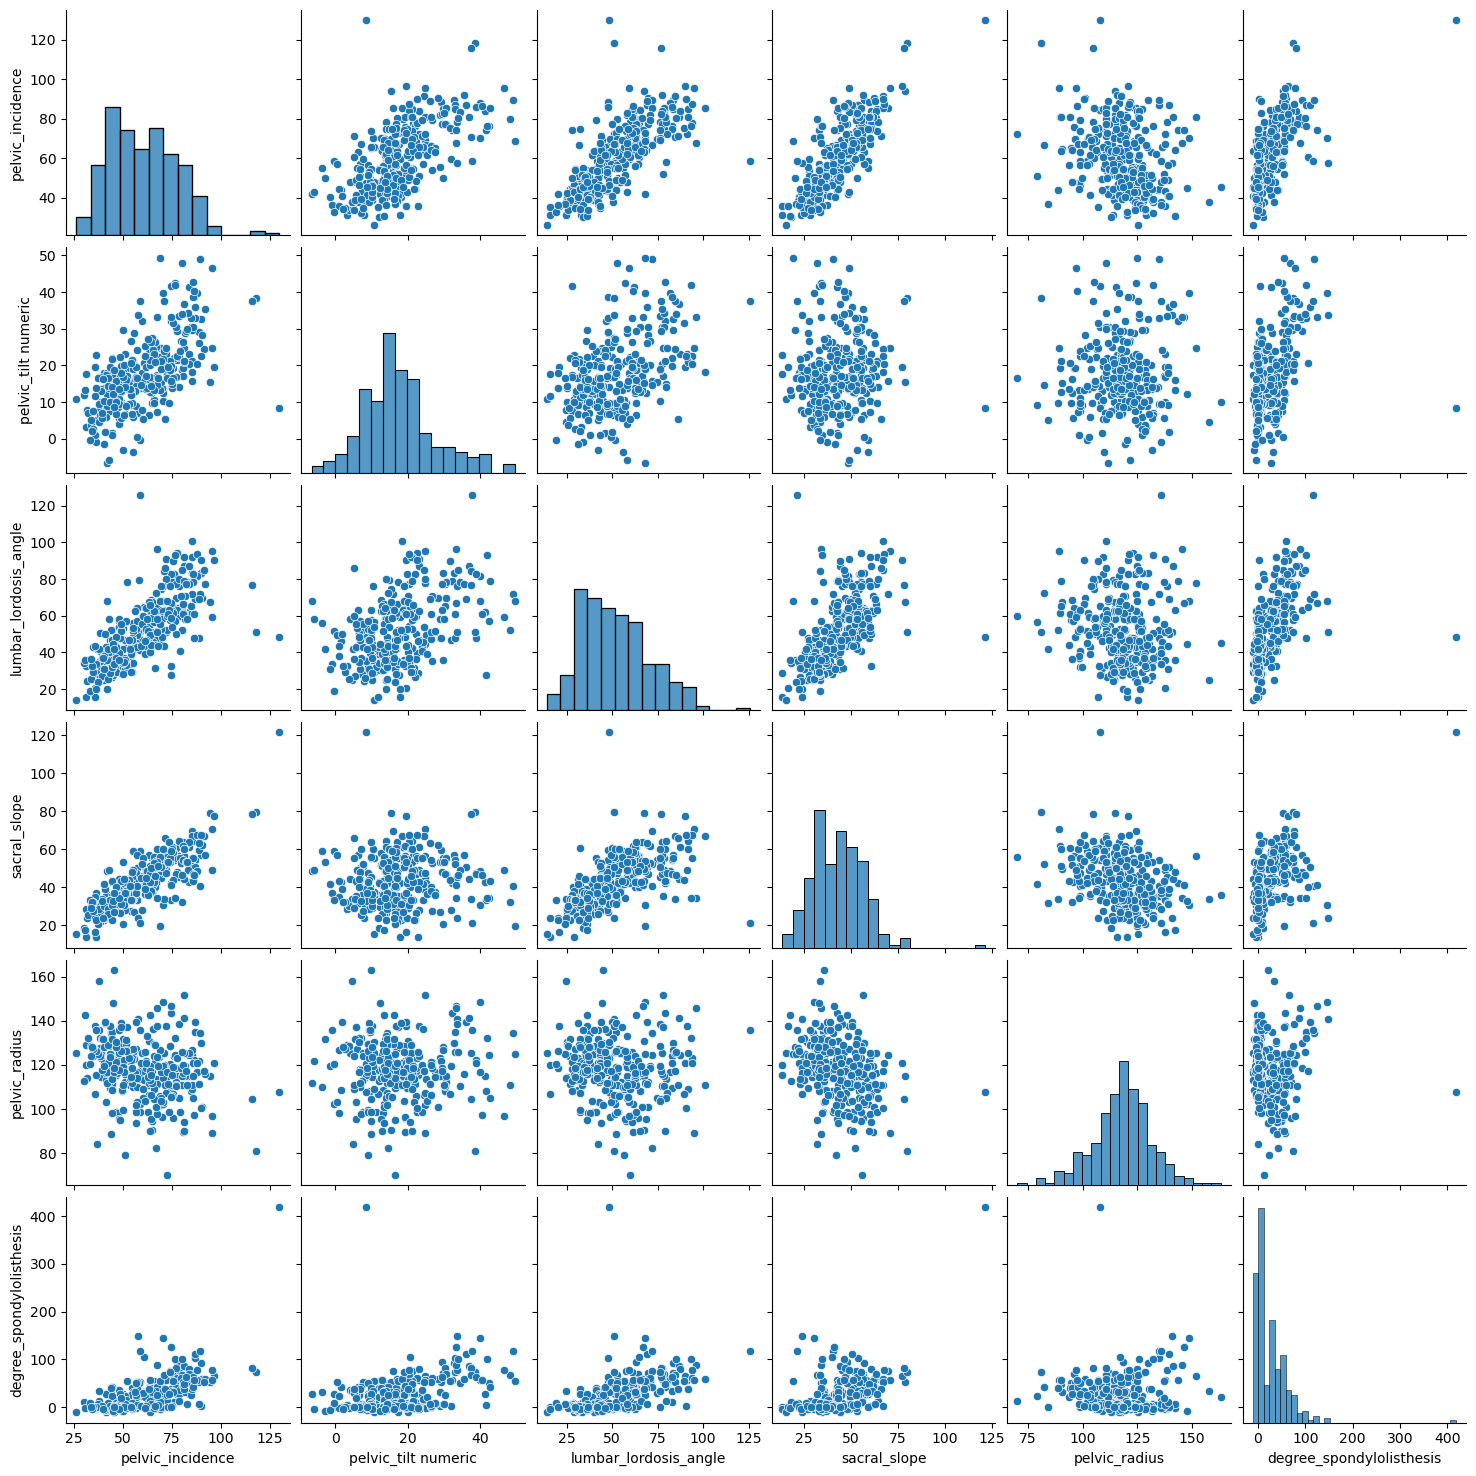

In [5]:
sns.pairplot(x_data)
plt.show()

**Normalize data**
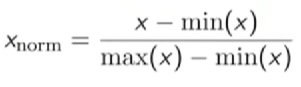

In [6]:
x_data

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501
...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750


In [7]:
#normalization
x = (x_data - x_data.min()) / (x_data.max() - x_data.min()).values
x

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,0.355688,0.519900,0.229180,0.250857,0.307461,0.025148
1,0.124501,0.296783,0.098578,0.144629,0.476649,0.036365
2,0.411666,0.513932,0.322995,0.307661,0.386097,0.017523
3,0.416151,0.557414,0.271260,0.289436,0.341826,0.051838
4,0.227272,0.289479,0.128129,0.247022,0.409579,0.044173
...,...,...,...,...,...,...
305,0.209822,0.360293,0.196881,0.193591,0.509380,0.015858
306,0.268009,0.487194,0.136211,0.183674,0.476223,0.024761
307,0.340438,0.522443,0.287897,0.234907,0.597796,0.019437
308,0.184257,0.272352,0.246846,0.214623,0.521175,0.026240


**Splitting data Train and Test**

In [8]:
# splitting
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, random_state = 42)

"""# take transpose
x_train = x_train.T
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T"""

print(f"x_train : {x_train.shape}")
print(f"x_test : {x_test.shape}")
print(f"y_train : {y_train.shape}")
print(f"y_test : {y_test.shape}")

x_train : (263, 6)
x_test : (47, 6)
y_train : (263,)
y_test : (47,)


**Logistic Regression Model Training with Sklearn**

In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

In [11]:
test_accuracy = log_reg.score(x_test, y_test)
print(f'Accuracy : {test_accuracy}')

Accuracy : 0.7872340425531915


## K-Nearest Neighbors (K-NN)
- The K-Nearest Neighbors algorithm involves looking at the proximity of a new individual to k previous individuals based on features extracted during classification.
- Euclidean distance is generally used as the measure of proximity.
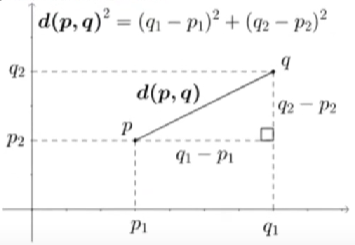

- For example, we want to find the class of the orange data point shown below.
- We will use the 3-Nearest Neighbors algorithm.
- The Euclidean distance between the orange point and other points is calculated.
- The classes of the 3 nearest neighbors to the orange point are examined. In this example, the 3 nearest points to the orange point are 2 red and 1 blue.
- Based on this calculation, the class of the orange point is determined to be red.

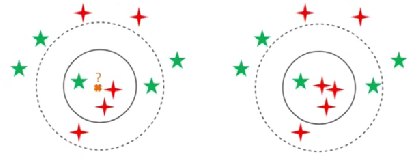

**Preprocessing**
- In this section, we will import the data and visualize it.
- Then, we will normalize the data and split it into training and test sets.

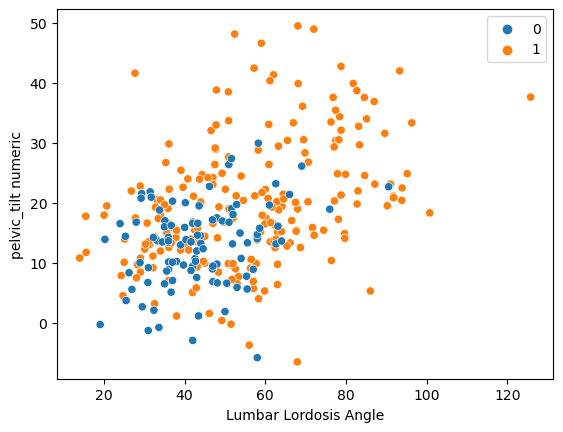

In [12]:
sns.scatterplot(data = df, x = 'lumbar_lordosis_angle', y = 'pelvic_tilt numeric', hue = 'class')
plt.xlabel('Lumbar Lordosis Angle')
plt.ylabel('pelvic_tilt numeric')
plt.legend()
plt.show()

- As seen in the two-dimensional visualization, the K-Nearest Neighbors algorithm can be a challenging problem because abnormal and normal classes are intertwined in two dimensions. (Two dimensions are not sufficient for us to reach a definitive conclusion, but it is useful for an initial impression.)

**K-NN Algorithm Model Training with Sklearn**

In [13]:
from sklearn.neighbors import KNeighborsClassifier
n = 4
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)
print(f'K-NN Accuracy : {n, knn.score(x_test, y_test)}')

K-NN Accuracy : (4, 0.7446808510638298)


**Find best k value**

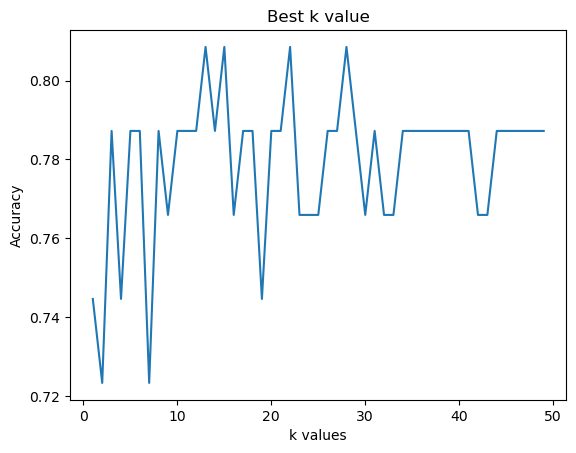

In [14]:
score_list = []
for each in range(1, 50):
    knn2 = KNeighborsClassifier(n_neighbors = each)
    knn2.fit(x_train, y_train)
    score_list.append(knn2.score(x_test, y_test))

plt.plot(range(1,50), score_list)
plt.xlabel('k values')
plt.ylabel('Accuracy')
plt.title('Best k value')
plt.show()

## Support Vector Machine
### What is a Support Vector Machine?
- A support vector machine can be defined as a vector space-based machine learning method that finds a decision boundary between two classes that are farthest from any point in the training data.
- The foundations of Support Vector Machines, a supervised learning algorithm, were laid by Vladimir Vapnik and Alexey Chervonenkis in 1963.
- In 1995, it was developed by Vladimir Vapnik, Bernhard Boser, and Isabelle Guyon.
- Support Vector Machines are primarily used to separate data assigned to two classes in the most appropriate way using support vectors.
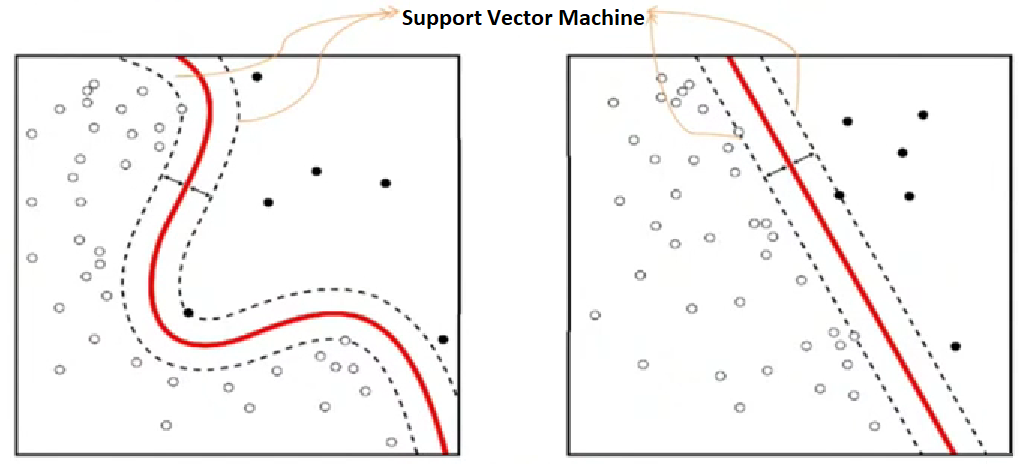
- Data that is linearly separable and not linearly separable can be classified using the support vector machine algorithm.
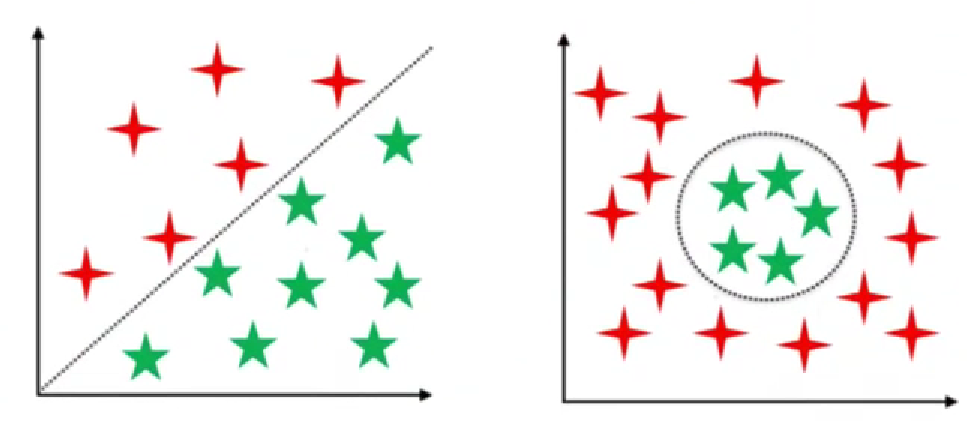

**Preprocessing**

In [15]:
df.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1


**Support Vector Machine Model Training with Sklearn**

In [16]:
from sklearn.svm import SVC

svm = SVC(random_state = 1)
svm.fit(x_train, y_train)

print(f'Support Vector Machine Accuracy : {svm.score(x_test, y_test)}')

Support Vector Machine Accuracy : 0.851063829787234


## Decision Tree
### What is a Decision Tree?
- A decision tree is a structure similar to a flowchart where each internal node represents a test on an attribute, each branch represents the outcome of the test, and each leaf node represents a class label.
- For example, we want to decide whether a football match will be organized or not using the decision tree method.
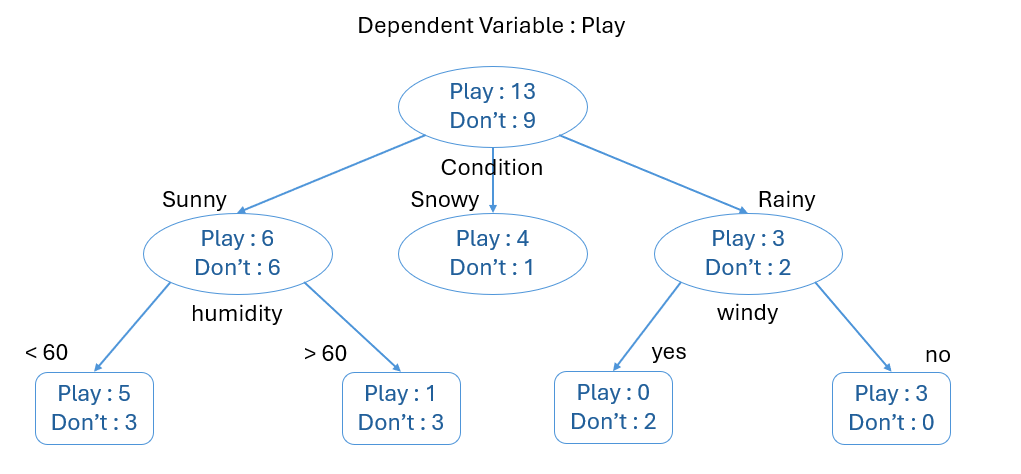

**Preprocessing**

**Decision Tree Model Training with Sklearn**

In [17]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

print(f'Decision Tree Accuracy : {dt.score(x_test, y_test)}')

Decision Tree Accuracy : 0.7659574468085106


## Random Forest
### What is a Random Forest?
- It is an ensemble learning method that creates a large number of decision trees during the training phase for classification and makes class predictions based on the type of problem.
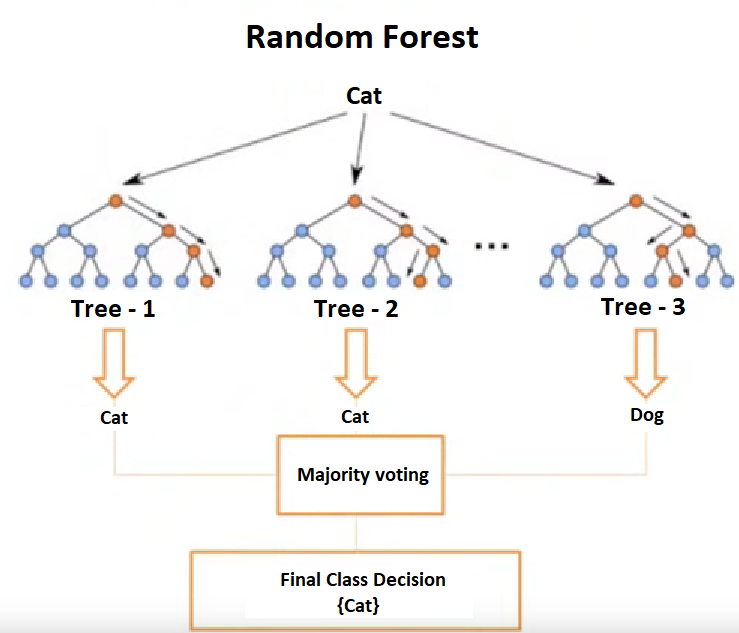

**Preprocessing**

**Decision Tree Model Training with Sklearn**

In [18]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 100, random_state = 1)
rf.fit(x_train, y_train)

print(f'Random Forest Accuracy : {rf.score(x_test, y_test)}')

Random Forest Accuracy : 0.851063829787234


## Evaluation of classification models 
### Accuracy
- Accuracy is the degree of closeness of a measurement system's measurement value to the true value of a quantity.
- In the examples we have done so far, we have always used accuracy, so we will not make a separate example for it.
### Confusion Matrix
- In machine learning, and especially in statistical classification problems, a confusion matrix, also known as an error matrix, is a special table layout that allows the visualization of an algorithm's performance, typically in a supervised learning setting.
- Let's make an example.
    * Suppose we have 13 images. 8 of these images are of cats, and 5 are of dogs.
    * Let cats be class 1 and dogs be class 0.
    * If we write the true classes of these images in a list: [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
    * Let's assume we gave these images to a classifier and the classifier's predictions were [0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1].
    * Let's create a table to interpret these two lists.
    
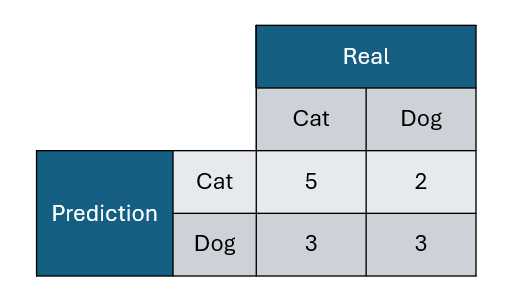
    
    * According to the table, the classifier makes 8 correct predictions.
    * The classifier misses 5 predictions: 3 cats (the first 3 predictions) and 2 dogs incorrectly predicted as cats (the last 2 predictions).


In [19]:
from sklearn.metrics import confusion_matrix

predictions = {
    'Logistic Regression': log_reg.predict(x_test),
    'KNN': knn.predict(x_test),
    'SVM': svm.predict(x_test),
    'Decision Tree': dt.predict(x_test),
    'Random Forest': rf.predict(x_test)
}

for title, cm in predictions.items():
    print(f'{title} Confusion Matrix \n {confusion_matrix(y_test,cm)}')

Logistic Regression Confusion Matrix 
 [[ 5  7]
 [ 3 32]]
KNN Confusion Matrix 
 [[10  2]
 [10 25]]
SVM Confusion Matrix 
 [[ 9  3]
 [ 4 31]]
Decision Tree Confusion Matrix 
 [[ 6  6]
 [ 5 30]]
Random Forest Confusion Matrix 
 [[10  2]
 [ 5 30]]


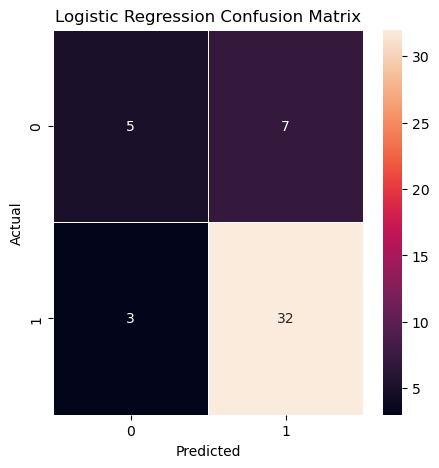

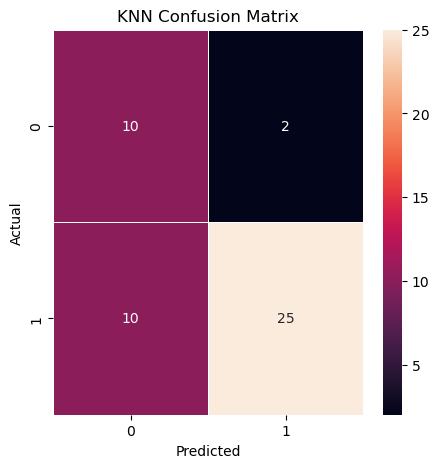

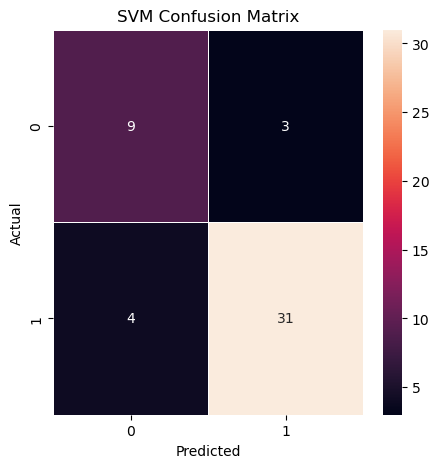

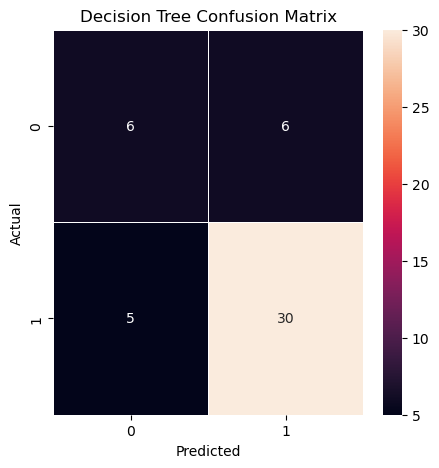

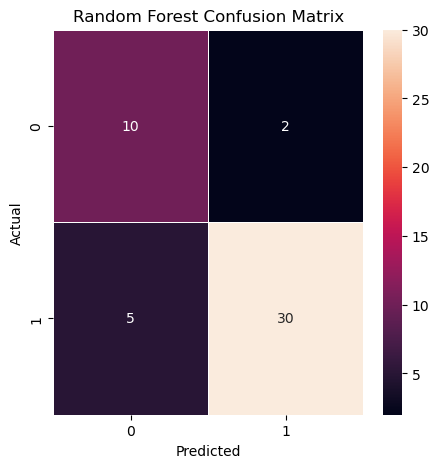

In [23]:
def plot_confusion_matrix(cm, title='Confusion Matrix'):
    f, ax = plt.subplots(figsize=(5, 5))
    sns.heatmap(cm, annot=True, linewidths=0.5, linecolor='white', fmt=".0f", ax=ax)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.show()
    
# Compute confusion matrices
cm_lr = confusion_matrix(y_test, log_reg.predict(x_test))
cm_knn = confusion_matrix(y_test, knn.predict(x_test))
cm_svm = confusion_matrix(y_test, svm.predict(x_test))
cm_dt = confusion_matrix(y_test, dt.predict(x_test))
cm_rf = confusion_matrix(y_test, rf.predict(x_test))

# Define all confusion matrices in one place
confusion_matrices = {
    'Logistic Regression': cm_lr,
    'KNN': cm_knn,
    'SVM': cm_svm,
    'Decision Tree': cm_dt,
    'Random Forest': cm_rf
}

# Plotting the confusion matrices
for title, cm in confusion_matrices.items():
    plot_confusion_matrix(cm, title=f'{title} Confusion Matrix')